In [1]:

!pip install -q seaborn scikit-learn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (8, 5)

In [2]:
from google.colab import files
uploaded = files.upload()


df = pd.read_csv('Mall_Customers.csv')
df.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:

df.info()


df.describe(include='all')


df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
df_clean = df.drop(columns=['CustomerID', 'Gender'])
df_clean.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:

scaler = StandardScaler()
X = scaler.fit_transform(df_clean)

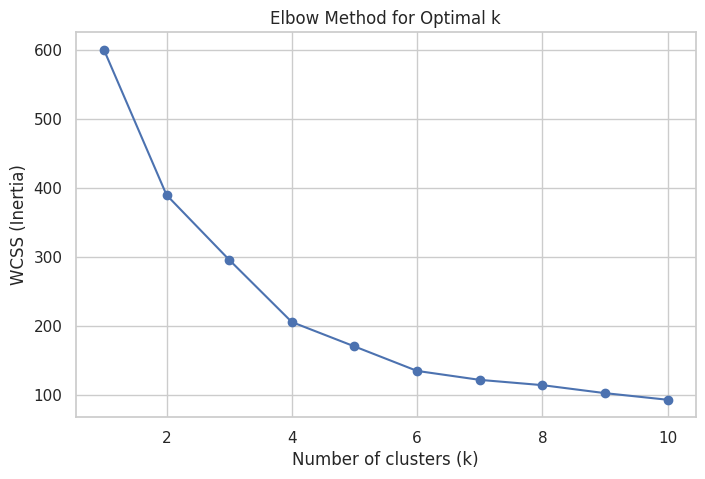

In [6]:

wcss = []


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [7]:

k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X)


df['Cluster'] = clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


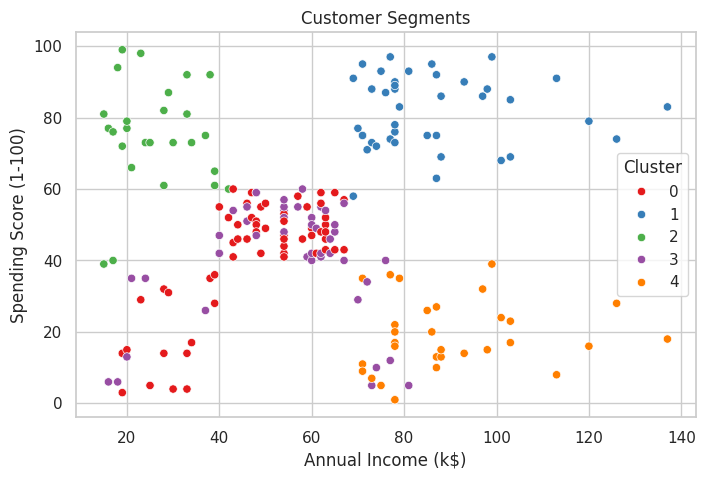

In [8]:
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1'
)
plt.title('Customer Segments')
plt.show()

In [9]:

profile = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].agg(['mean','median','min','max'])
print(profile)


counts = df['Cluster'].value_counts().sort_index()
print("\nNumber of customers in each cluster:\n", counts)

               Age                Annual Income (k$)                  \
              mean median min max               mean median min  max   
Cluster                                                                
0        55.275862   53.0  40  70          47.620690   48.5  19   67   
1        32.875000   32.0  27  40          86.100000   78.5  69  137   
2        25.769231   24.0  18  35          26.115385   24.5  15   42   
3        26.733333   26.0  18  40          54.311111   59.0  16   81   
4        44.387097   44.0  32  59          89.774194   87.0  71  137   

        Spending Score (1-100)                 
                          mean median min max  
Cluster                                        
0                    41.706897   46.0   3  60  
1                    81.525000   83.0  58  97  
2                    74.846154   75.5  39  99  
3                    40.911111   46.0   5  60  
4                    18.483871   17.0   1  39  

Number of customers in each cluster:
 

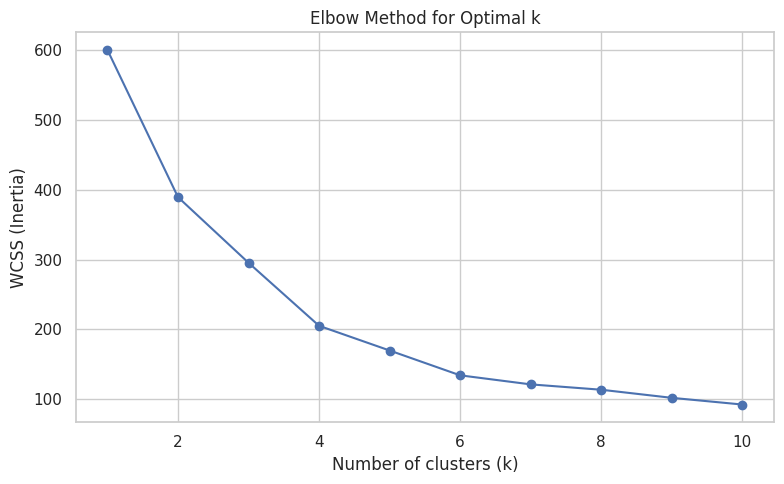

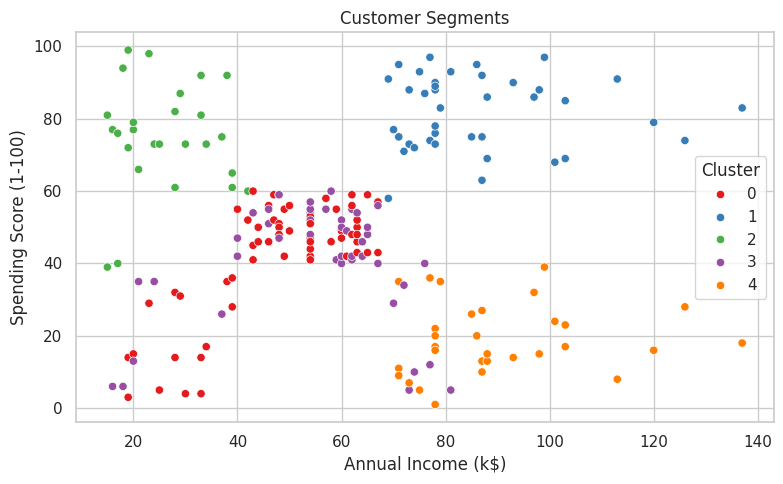

In [11]:
import os


os.makedirs('images', exist_ok=True)


plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.tight_layout()
plt.savefig('images/elbow_curve.png', dpi=300)


plt.figure()
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1'
)
plt.title('Customer Segments')
plt.tight_layout()
plt.savefig('images/segments_income_spending.png', dpi=300)